# ANALYSIS ON VIOLENCE AGAINST WOMEN

## About the Data

The Demographic and Health Surveys (DHS) Program aims to improve the collection, analysis, and dissemination of population, health, and nutrition data to enhance national and international policy-making. This data explores attitudes and perceived justifications for violence against women across African, Asian, and South American countries.

## Key highlights of the data:
- Scope: Representative survey data from men and women across various countries.
- Focus: Attitudes towards violence against women, segmented by sociodemographic factors like Education Level, Marital Status, Employment, and Age Group.
- Insights:
    - Access to education emerges as a key factor in reducing attitudes that justify violence against women.
    - Raising public awareness and increasing access to education for women and girls is critical to ending violence against women globally.

The data sheds light on the assumptions and attitudes that hinder progress in the global campaign to end violence against women and girls.

## Dataset Description

- **RecordID**: Numeric value unique to each question by country.  
- **Country**: Country in which the survey was conducted.  
- **Gender**: Whether the respondents were Male or Female.  
- **Demographics Question**: Refers to the different types of demographic groupings used to segment respondents – marital status, education level, employment status, residence type, or age.  
- **Demographics Response**: Refers to the demographic segment into which the respondent falls.  
- **Question**: Respondents were asked if they agreed with the following statements.  
- **Survey Year**: Year in which the Demographic and Health Survey (DHS) took place.  
- **Value**: Percentage of people surveyed in the relevant group who agree with the question.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

In [64]:
file_path = "C:/Users/prana/Downloads/Violence Against Women  Girls Data.csv"
data = pd.read_csv(file_path)

In [65]:
data.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [66]:
data.isnull().sum()

RecordID                    0
Country                     0
Gender                      0
Demographics Question       0
Demographics Response       0
Question                    0
Survey Year                 0
Value                    1413
dtype: int64

In [85]:
# filling missing 'Value' fields with mean values
data['Value'] = data['Value'].fillna(data['Value'].mean())

In [68]:
data.isnull().sum()

RecordID                 0
Country                  0
Gender                   0
Demographics Question    0
Demographics Response    0
Question                 0
Survey Year              0
Value                    0
dtype: int64

In [82]:
data['Survey Year'] = pd.to_datetime(data['Survey Year'])

In [86]:
# Standardized and categorized demographic responses
data['Demographics Response'] = data['Demographics Response'].str.title()

## Exploratory Data Analysis (EDA)

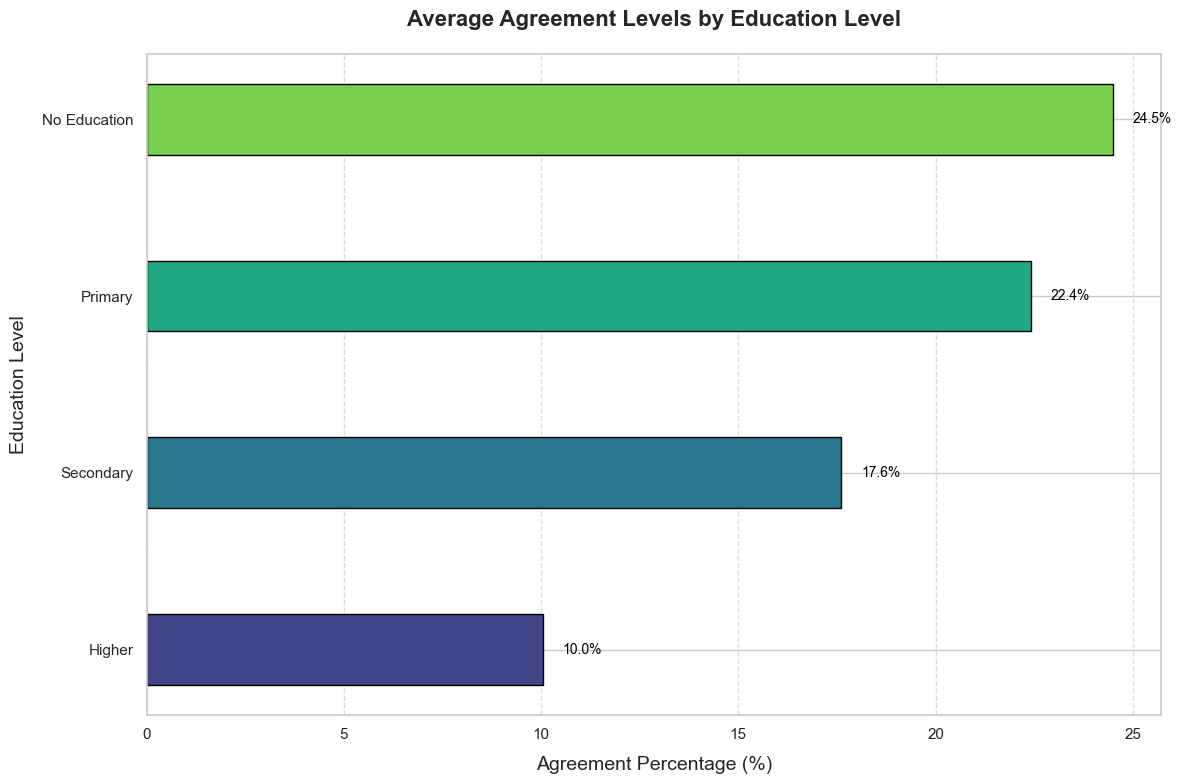

In [90]:
# Agreement Levels by Education Level

education_data = data[data["Demographics Question"] == "Education"]
education_avg = education_data.groupby("Demographics Response")["Value"].mean().sort_values()

colors = sns.color_palette("viridis", len(education_avg))

plt.figure(figsize=(12, 8))
bars = plt.barh(
    education_avg.index, 
    education_avg, 
    color=colors, 
    edgecolor='black', 
    height=0.4  
)

for bar, value in zip(bars, education_avg):
    plt.text(
        value + 0.5,  
        bar.get_y() + bar.get_height() / 2,  
        f"{value:.1f}%", 
        va='center', fontsize=10, color='black'
    )

plt.title("Average Agreement Levels by Education Level", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Agreement Percentage (%)", fontsize=14, labelpad=10)
plt.ylabel("Education Level", fontsize=14, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Interpretation: Agreement Levels by Education Level

This chart highlights the correlation between education level and agreement percentage with specific survey statements:

- **No Education**: Respondents with no formal education showed the highest level of agreement (**24.5%**).
- **Primary Education**: Agreement decreases slightly among respondents with primary education (**22.4%**).
- **Secondary Education**: A further reduction is seen in agreement levels for those with secondary education (**17.6%**).
- **Higher Education**: The lowest agreement percentage (**10.0%**) is observed among respondents with higher education.

#### Key Insight
The data suggests that higher levels of education are associated with lower agreement to the statements, potentially reflecting increased awareness or critical thinking with education.


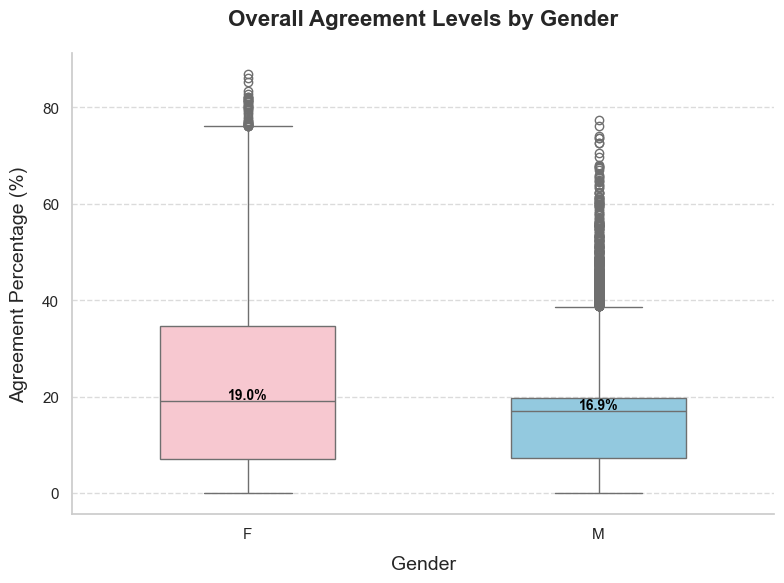

In [98]:
# Plotting the single boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=data,  # Use the entire dataset
    x="Gender",
    y="Value",
    hue="Gender",  # Assign Gender to hue
    palette=gender_palette,  # Define color palette for the hue
    width=0.5,
    dodge=False  # Ensures only one box per gender
)

# Adding median annotations
for i, gender in enumerate(overall_gender_data["Gender"]):
    median_value = data[data["Gender"] == gender]["Value"].median()
    ax.text(
        i, 
        median_value + 0.5,  # Offset slightly above the median
        f"{median_value:.1f}%",  
        horizontalalignment='center',
        fontsize=10,
        color="black",
        weight='bold'
    )

# Customizing the plot
plt.title("Overall Agreement Levels by Gender", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Gender", fontsize=14, labelpad=10)
plt.ylabel("Agreement Percentage (%)", fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()

plt.show()


### Interpretation: Agreement Levels by Gender  

This chart highlights the differences in agreement percentages between male and female respondents:

- **Females**: Show a higher median agreement percentage (19.0%) with the survey statements.  
- **Males**: Have a slightly lower median agreement percentage (16.9%).  
- **Variability**: Female responses show greater variability, as indicated by a wider interquartile range, compared to the more consistent agreement levels among males.  
- **Outliers**: Both genders have outliers, with some groups displaying significantly higher agreement percentages.  

**Key Insight**: Females generally agree more with the statements, but the variability and presence of outliers suggest additional factors, such as demographics or contextual differences, may influence agreement levels.

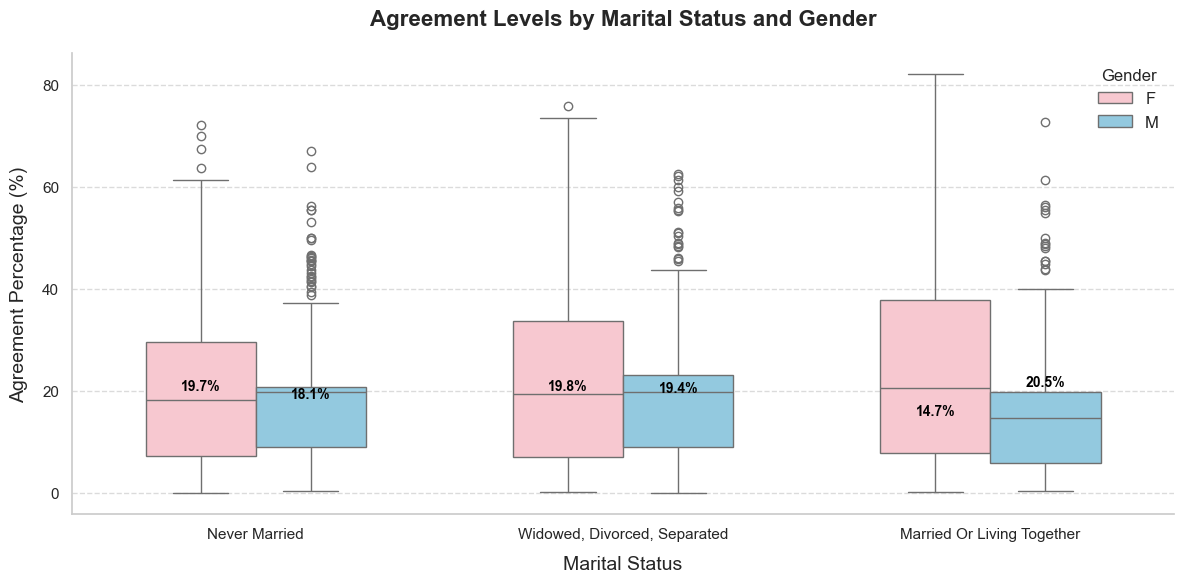

In [91]:
# Agreement Levels by Marital Status and Gender

data_filtered = data[data["Demographics Question"] == "Marital status"]

gender_palette = {"F": "pink", "M": "skyblue"}


plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=data_filtered,
    x="Demographics Response",
    y="Value",
    hue="Gender",
    palette=gender_palette, 
    width=0.6  
)

for i, marital_status in enumerate(data_filtered["Demographics Response"].unique()):
    for gender in ["F", "M"]:
        median_value = data_filtered[(data_filtered["Demographics Response"] == marital_status) & (data_filtered["Gender"] == gender)]["Value"].median()
        ax.text(
            i + (0.15 if gender == "F" else -0.15), 
            median_value + 0.5,  
            f"{median_value:.1f}%",  
            horizontalalignment='center',
            fontsize=10,
            color="black",
            weight='bold'
        )

plt.title("Agreement Levels by Marital Status and Gender", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Marital Status", fontsize=14, labelpad=10)
plt.ylabel("Agreement Percentage (%)", fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Gender", loc="upper right", fontsize=12, frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

### Interpretation: Agreement Levels by Marital Status and Gender

This boxplot visualizes the agreement levels of survey respondents, segmented by marital status and gender:

#### **Never Married**
- **Females**: The median agreement percentage is **19.7%**, while there is a wide range of values, suggesting varying opinions among females.
- **Males**: The median agreement for males is slightly lower at **18.1%**. Both males and females show high variation in agreement levels, with some extreme outliers.

#### **Widowed, Divorced, Separated**
- **Females**: The median for females is slightly higher at **19.8%**, with some outliers indicating diverse opinions.
- **Males**: Males show a similar median at **19.4%**, with a few higher outliers but relatively less variation compared to females.

#### **Married or Living Together**
- **Females**: Females in this group have the lowest median agreement percentage (**14.7%**).
- **Males**: Males show a higher median agreement at **20.5%**, and their responses are generally more consistent compared to females in this group.

### **Key Insight**
- Overall, women tend to have a slightly higher median agreement in the "Never Married" and "Widowed, Divorced, Separated" groups, whereas men show a higher agreement percentage in the "Married or Living Together" group.
- The variation in responses suggests that **marital status and gender influence how respondents perceive the statements**, with men showing generally higher agreement in the "Married or Living Together" group.


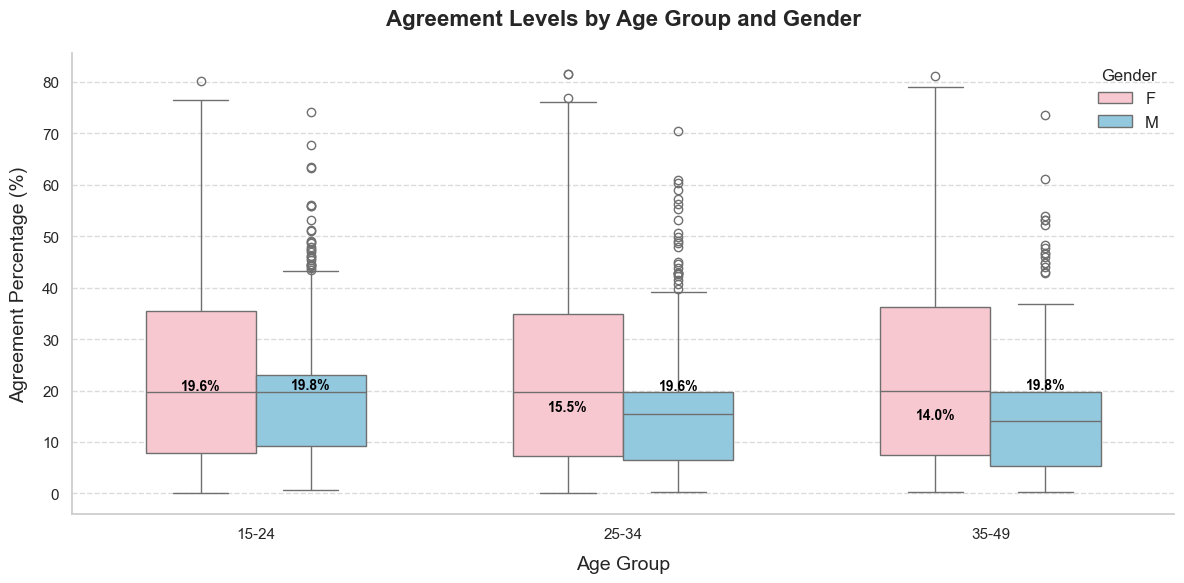

In [100]:
# Agreement Levels by Age Group and Gender
data_filtered = data[data["Demographics Question"] == "Age"]

gender_palette = {"F": "pink", "M": "skyblue"}

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=data_filtered,
    x="Demographics Response",
    y="Value",
    hue="Gender",
    palette=gender_palette,  
    width=0.6 
)

for i, age_group in enumerate(data_filtered["Demographics Response"].unique()):
    for gender in ["F", "M"]:
        median_value = data_filtered[(data_filtered["Demographics Response"] == age_group) & (data_filtered["Gender"] == gender)]["Value"].median()
        ax.text(
            i + (0.15 if gender == "F" else -0.15), 
            median_value + 0.5,  
            f"{median_value:.1f}%",  
            horizontalalignment='center',
            fontsize=10,
            color="black",
            weight='bold'
        )

plt.title("Agreement Levels by Age Group and Gender", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Age Group", fontsize=14, labelpad=10)
plt.ylabel("Agreement Percentage (%)", fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Gender", loc="upper right", fontsize=12, frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

## Interpretation: Agreement Levels by Age Group and Gender

This analysis explores the agreement levels of survey respondents segmented by age group and gender:

### 15-24 Age Group:
- **Females**: The average agreement percentage for females is 19.6%, showing relatively consistent responses with less variability.
- **Males**: Males have a slightly higher average agreement at 19.8%, with similar consistency in their responses compared to females.

### 25-34 Age Group:
- **Females**: The average agreement for females drops to 15.5%, with a wider range of values indicating more varied opinions among this group.
- **Males**: Males show a higher average agreement at 19.6%, maintaining a relatively stable level of agreement.

### 35-49 Age Group:
- **Females**: The average agreement for females declines further to 14.0%, with notable variability, suggesting a generational shift in attitudes.
- **Males**: Males continue to have the highest average agreement at 19.8%, with more consistent responses across this age group.

### Key Insights:
- **Gender Differences**: Males generally exhibit higher agreement levels across all age groups. Their agreement percentage remains consistent at around 19.8%, while females' agreement levels decrease notably with age.
- **Variation Across Age Groups**: Females experience wider variability in agreement levels, especially in the 25-34 and 35-49 age groups, which suggests that generational or experiential factors may influence their attitudes as they age.
- **Trends in Agreement**: While male agreement levels remain stable, female agreement levels notably decrease with age, indicating a possible shift in perspectives among older females.


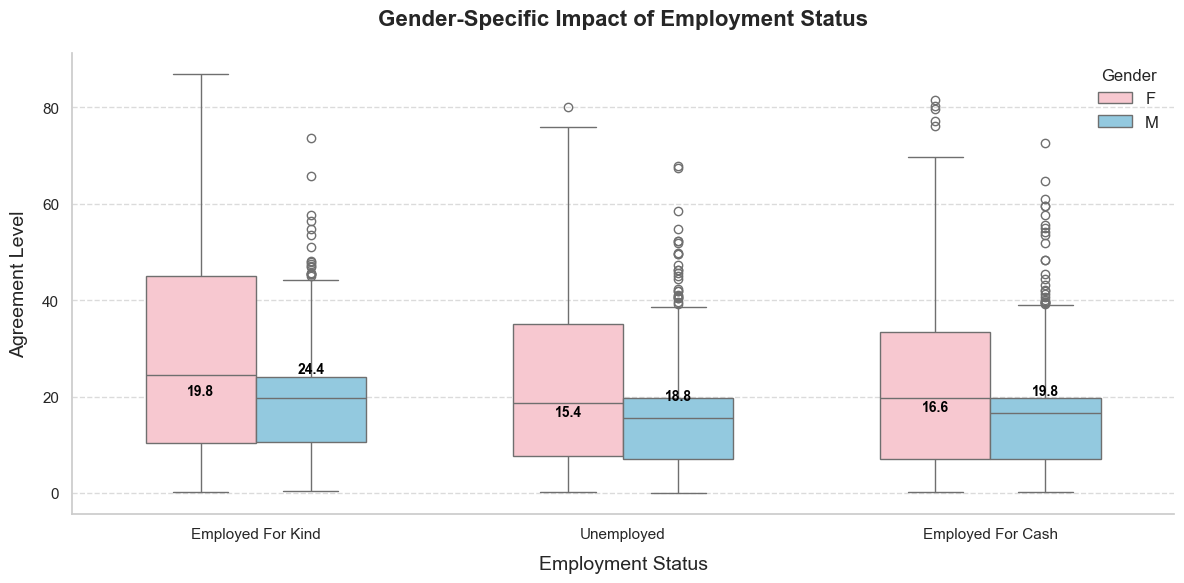

In [101]:
gender_employment_data = data[
    data['Demographics Question'].str.contains("Employment", na=False)
]

gender_palette = {"F": "pink", "M": "skyblue"}

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=gender_employment_data,
    x="Demographics Response",
    y="Value",
    hue="Gender",
    palette=gender_palette,
    width=0.6
)

for i, employment_status in enumerate(gender_employment_data["Demographics Response"].unique()):
    for gender in ["F", "M"]:
        median_value = gender_employment_data[(gender_employment_data["Demographics Response"] == employment_status) & (gender_employment_data["Gender"] == gender)]["Value"].median()
        ax.text(
            i + (0.15 if gender == "F" else -0.15),
            median_value + 0.5,
            f"{median_value:.1f}",
            horizontalalignment='center',
            fontsize=10,
            color="black",
            weight='bold'
        )

plt.title("Gender-Specific Impact of Employment Status", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Employment Status", fontsize=14, labelpad=10)
plt.ylabel("Agreement Level", fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Gender", loc="upper right", fontsize=12, frameon=False)
sns.despine()
plt.tight_layout()
plt.show()


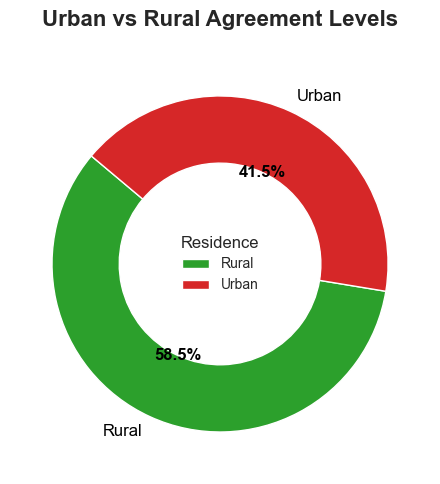

In [75]:
# Filter data for residence and calculate the average value for Urban and Rural
residence_data = data[data["Demographics Question"] == "Residence"]
residence_avg = residence_data.groupby("Demographics Response")["Value"].mean()

# Define colors for Urban and Rural
colors = ["#2ca02c", "#d62728"]  # Green for Urban, Red for Rural

# Plotting the donut chart
plt.figure(figsize=(5, 5))

# Create the pie chart and then modify it to look like a donut chart
wedges, texts, autotexts = plt.pie(
    residence_avg, 
    labels=residence_avg.index, 
    autopct="%.1f%%", 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4),  # Create the donut effect by setting width
    textprops={'size': 12, 'color': 'black'},  # Set the font properties for labels
)

# Add annotations to the chart
for i, autotext in enumerate(autotexts):
    autotext.set(weight="bold")  # Make annotation text bold

# Set title
plt.title("Urban vs Rural Agreement Levels", fontsize=16, fontweight="bold", pad=20)

# Add a legend
plt.legend(
    wedges, 
    residence_avg.index, 
    title="Residence", 
    loc="center", 
    fontsize=10, 
    frameon=False
)

# Display the chart
plt.tight_layout()
plt.show()

## Urban vs Rural Agreement Levels 
This donut chart compares the agreement levels between urban and rural respondents.  

- **Rural Respondents:** 58.5% of the respondents from rural areas agreed with the survey statements.  
- **Urban Respondents:** 41.5% of urban respondents showed agreement.  

### Key Insight:  
The data suggests that rural respondents tend to agree more frequently with the statements compared to their urban counterparts. This disparity could be attributed to differences in access to information, cultural norms, or levels of exposure to external influences.


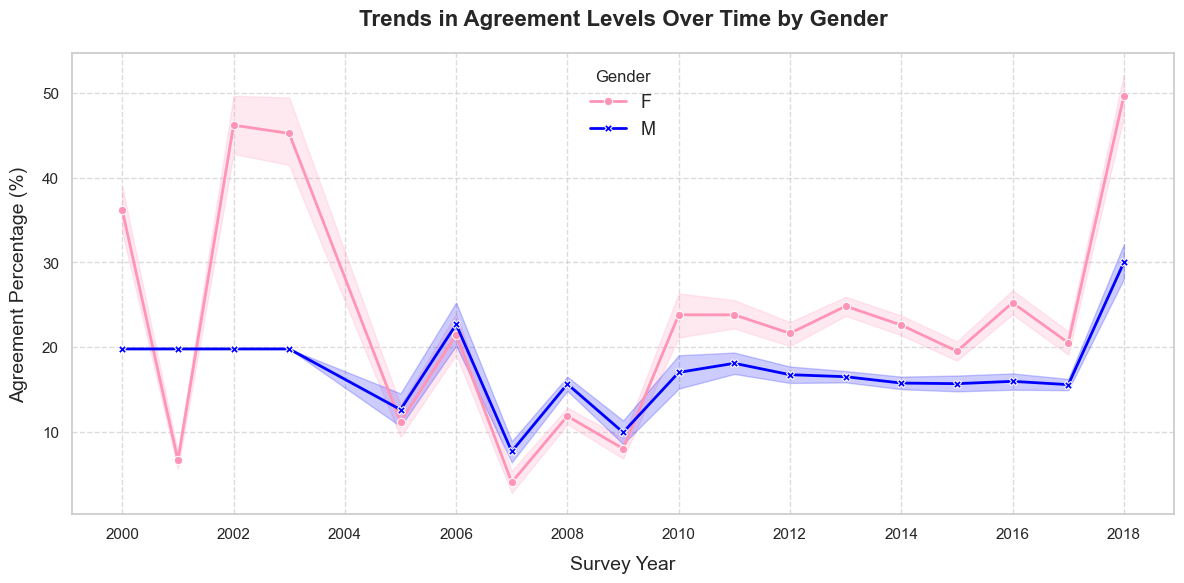

In [104]:
# Trends in Agreement Levels Over Time by Gender

gender_palette = {"F": "#FF94B6", "M": "blue"}

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=data,
    x="Survey Year",
    y="Value",
    hue="Gender",
    style="Gender",
    markers=True,
    dashes=False,
    palette=gender_palette,
    linewidth=2
)

plt.title("Trends in Agreement Levels Over Time by Gender", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Survey Year", fontsize=14, labelpad=10)
plt.ylabel("Agreement Percentage (%)", fontsize=14, labelpad=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Gender", fontsize=13, loc="upper center", frameon=False)
plt.tight_layout()
plt.show()


## Trends in Agreement Levels Over Time by Gender 

This line graph showcases how agreement levels have fluctuated over time for male and female respondents.

- **Female Respondents (Pink Line):**  
  - Higher agreement percentages compared to males in most years.  
  - A significant rise in agreement levels was observed post-2016, peaking in 2018.  
- **Male Respondents (Blue Line):**  
  - Generally consistent and lower agreement percentages over the years.  
  - Gradual increase after 2010, with a noticeable upward trend in 2018.  

### Key Insight:  
Females consistently displayed higher agreement levels, possibly reflecting gendered perspectives or social influences on opinion formation. The sharp increase after 2016 might indicate shifting attitudes due to societal or policy changes.



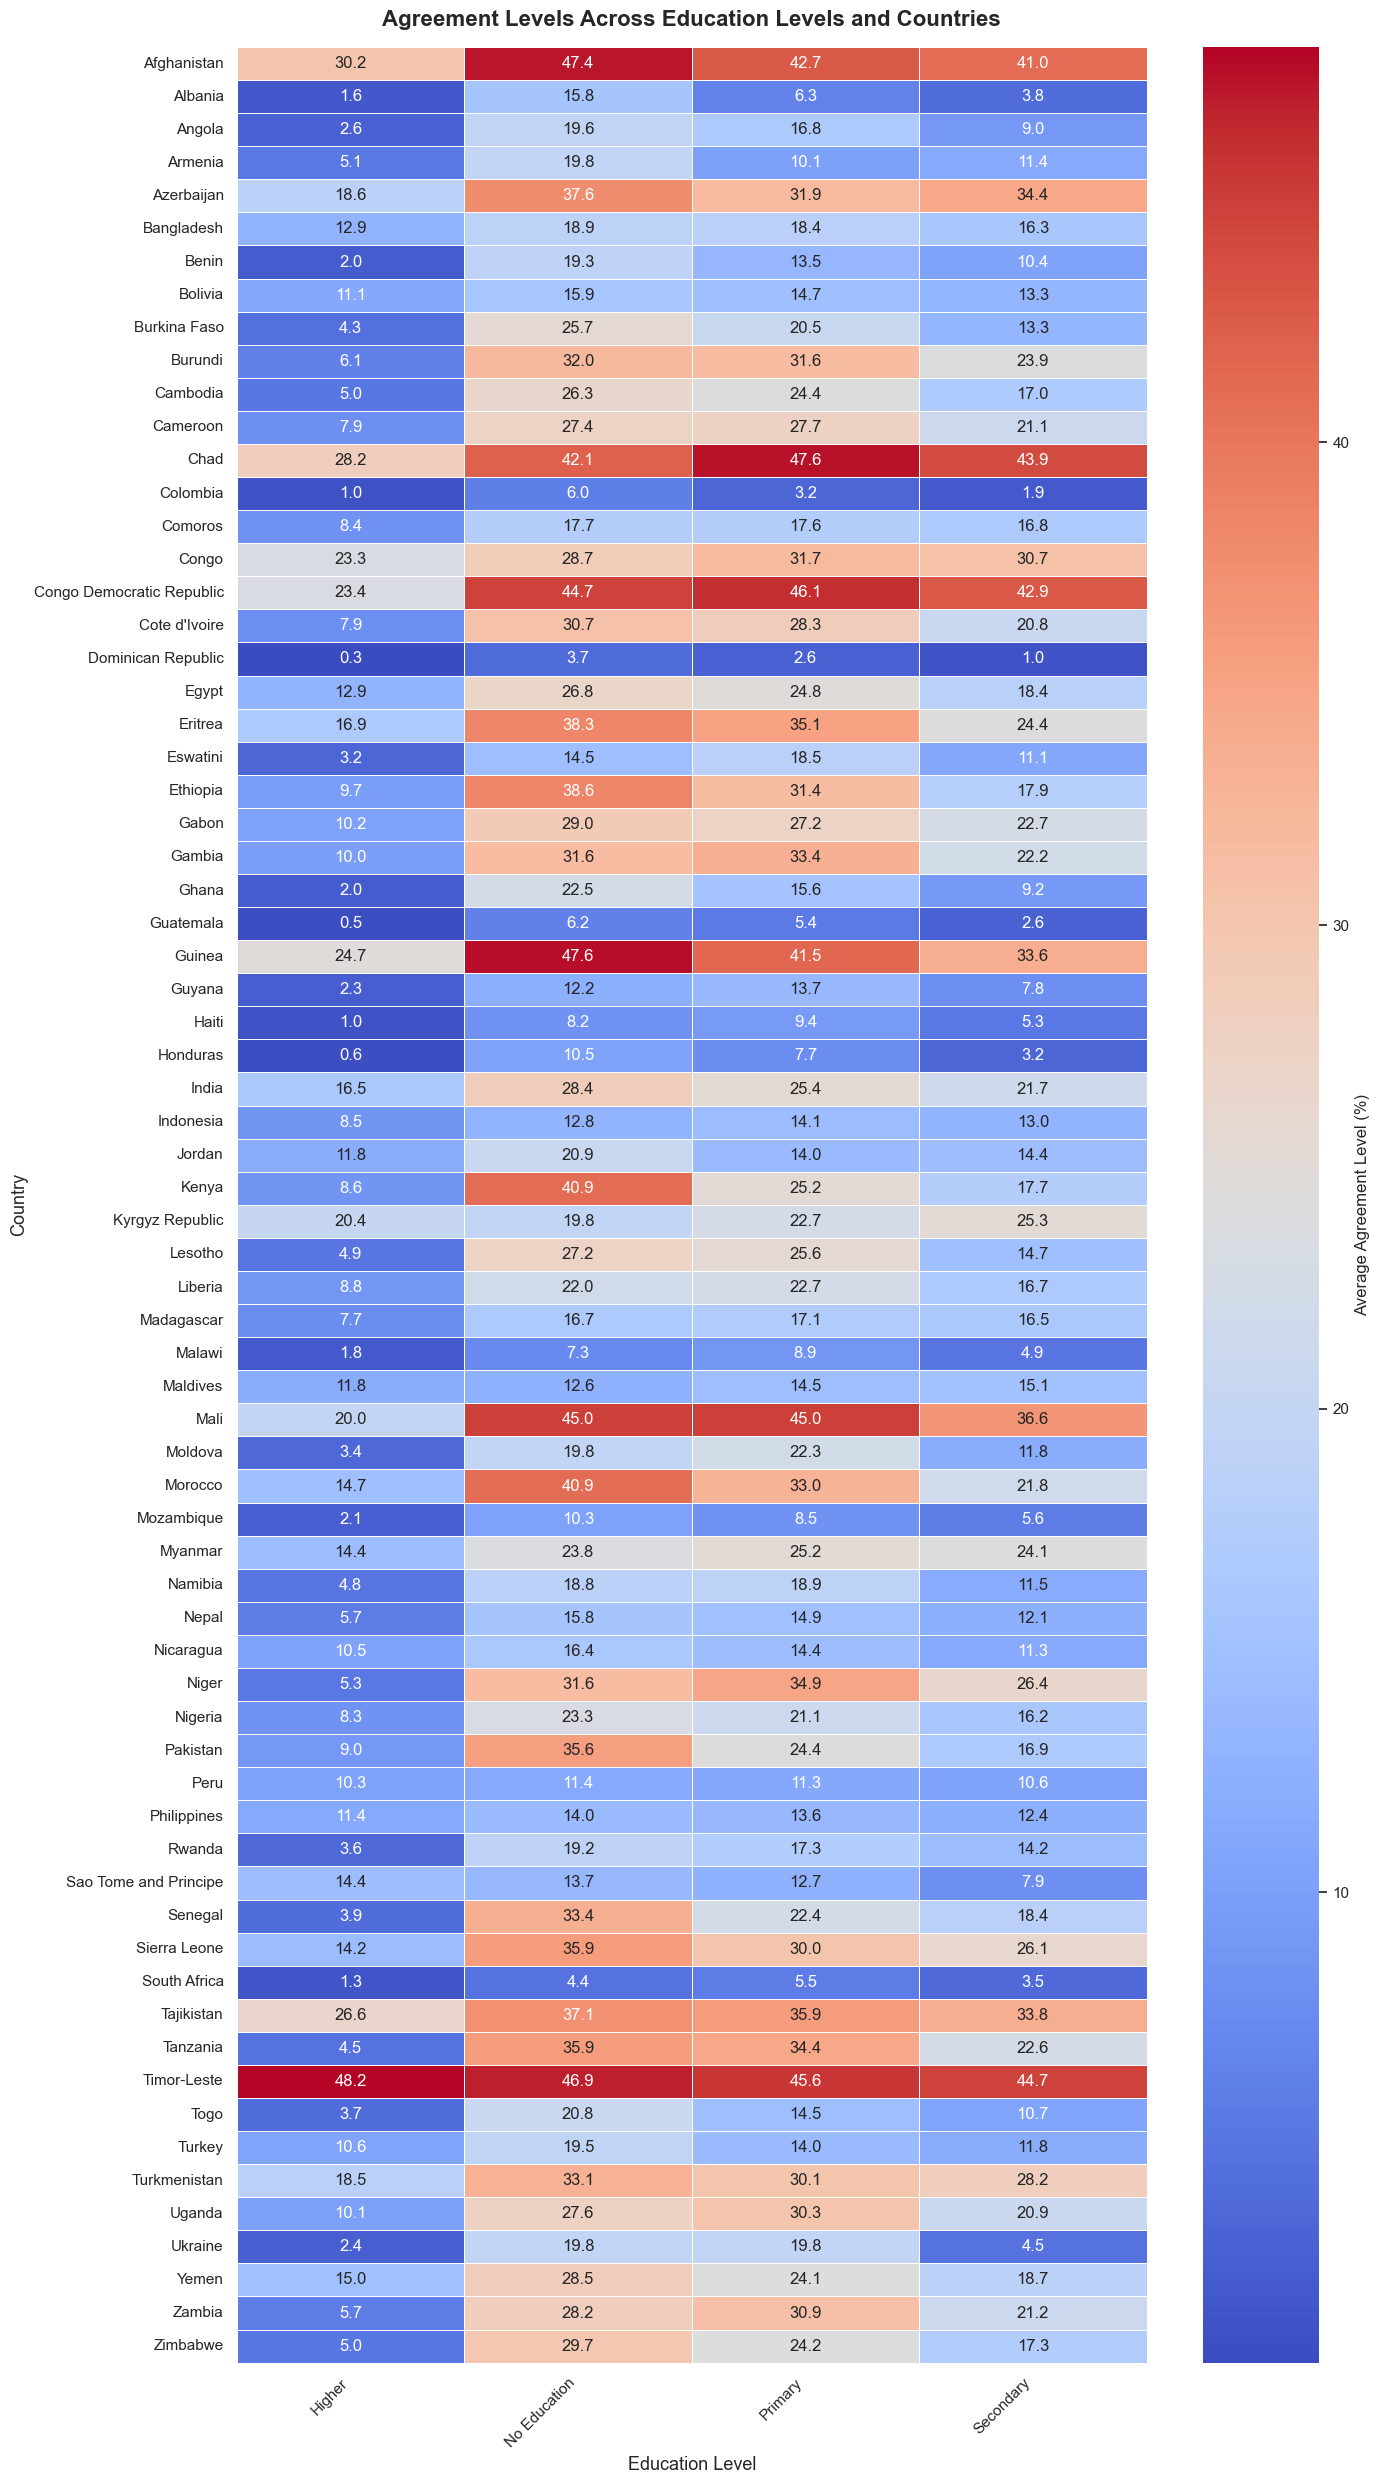

In [105]:
# Agreement Levels Across Education Levels and Countries

education_data = data[data["Demographics Question"] == "Education"]

education_pivot = education_data.pivot_table(
    index="Country", 
    columns="Demographics Response", 
    values="Value", 
    aggfunc="mean"
)

plt.figure(figsize=(14, 25))
sns.heatmap(
    education_pivot, 
    cmap="coolwarm", 
    annot=True,
    fmt=".1f", 
    linewidths=0.5, 
    cbar_kws={"label": "Average Agreement Level (%)"}
)

plt.title(
    "Agreement Levels Across Education Levels and Countries", 
    fontsize=16, 
    weight="bold", 
    pad=15
)
plt.xlabel("Education Level", fontsize=13)
plt.ylabel("Country", fontsize=13)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


### Agreement Levels Across Education Levels and Countries

**Impact of Education Level:**
   - In many countries, individuals with no education show higher agreement percentages compared to those with primary, secondary, or higher education.
   - This suggests a strong negative correlation between education level and agreement with the notion of women being subjected to violence.

**Regional Observations:**
   - Countries like Chad, Timor-Leste, and Congo Democratic Republic exhibit notably high agreement levels across all education levels, emphasizing deeply rooted cultural or societal norms.
   - Conversely, countries such as Albania, Colombia, and the Dominican Republic have significantly lower agreement percentages, suggesting progress in changing attitudes.

**Education as a Mitigating Factor:**
   - In countries such as Guinea, Tanzania, and Mozambique, there is a visible drop in agreement levels as education levels increase, showcasing education’s role in shaping attitudes against violence.
   - However, some countries (e.g., Afghanistan) show less impact of higher education, where agreement levels remain relatively high even among educated groups.

**Outliers:**
   - Timor-Leste and Chad stand out for their exceptionally high agreement percentages, even among educated groups, suggesting a need for targeted interventions beyond just education.

**General Trends:**
   - Overall, individuals with higher education (post-secondary or university level) consistently show the lowest agreement levels across most countries, reinforcing the role of education in reducing tolerance for violence against women.


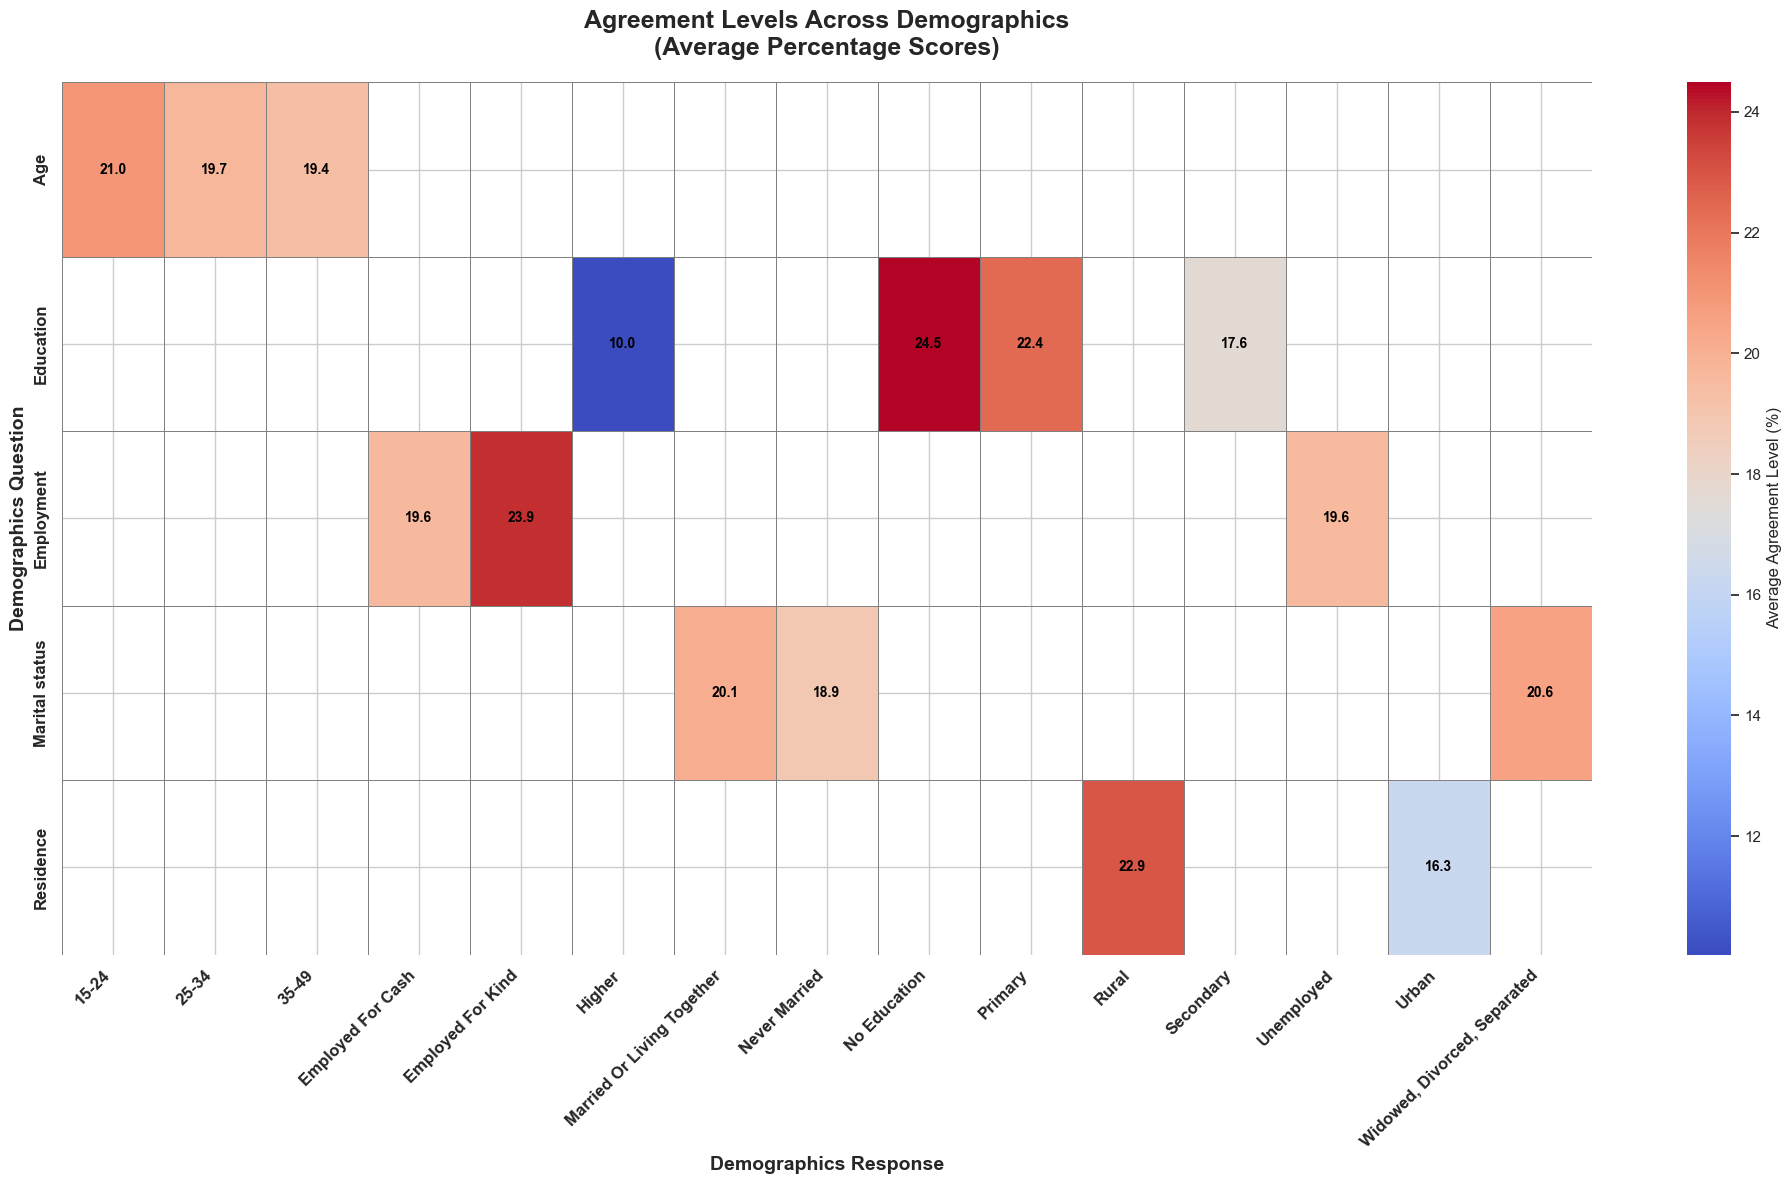

In [108]:
# Agreement Levels Across Demographics

heatmap_data = data.pivot_table(
    values="Value",
    index="Demographics Question",
    columns="Demographics Response",
    aggfunc="mean"  # Use the string "mean" to avoid the warning
)

plt.figure(figsize=(20, 12))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    annot_kws={"size": 10, "weight": "bold", "color": "black"},
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Average Agreement Level (%)", "orientation": "vertical"}
)

plt.title(
    "Agreement Levels Across Demographics\n(Average Percentage Scores)",
    fontsize=18,
    weight="bold",
    pad=20
)
plt.xlabel("Demographics Response", fontsize=14, weight="bold")
plt.ylabel("Demographics Question", fontsize=14, weight="bold")

plt.xticks(rotation=45, ha="right", fontsize=12, weight="bold")
plt.yticks(fontsize=12, weight="bold")

plt.tight_layout()
plt.show()

## Agreement Levels Across Demographics  

This heatmap visualizes agreement levels across various demographic groups based on factors like age, marital status, education, employment, and residence.  

- **Age:** Agreement levels are relatively consistent across age groups, ranging between 19-21%.  
- **Education:**  
  - Respondents with no formal education had the highest agreement levels (24.5%).  
  - Agreement decreased with higher levels of education, reaching a low of 10% for higher-educated respondents.  
- **Marital Status:**  
  - Married or living together respondents showed moderate agreement levels (19.6%).  
  - Widowed, divorced, or separated individuals exhibited the lowest agreement (16.3%).  
- **Employment:**  
  - Respondents employed for kind showed the highest agreement (23.9%), possibly reflecting limited exposure to diverse viewpoints.  
  - Unemployed individuals had moderate agreement levels (19.6%).  
- **Residence:**  
  - Rural respondents displayed higher agreement (22.9%) compared to urban respondents (16.3%).  

### Key Insight:  
The data underscores the influence of demographics on agreement levels. Lower agreement among higher-educated or urban respondents suggests increased skepticism or critical thinking, whereas rural or less-educated groups exhibit higher levels of agreement, potentially shaped by traditional or localized viewpoints.


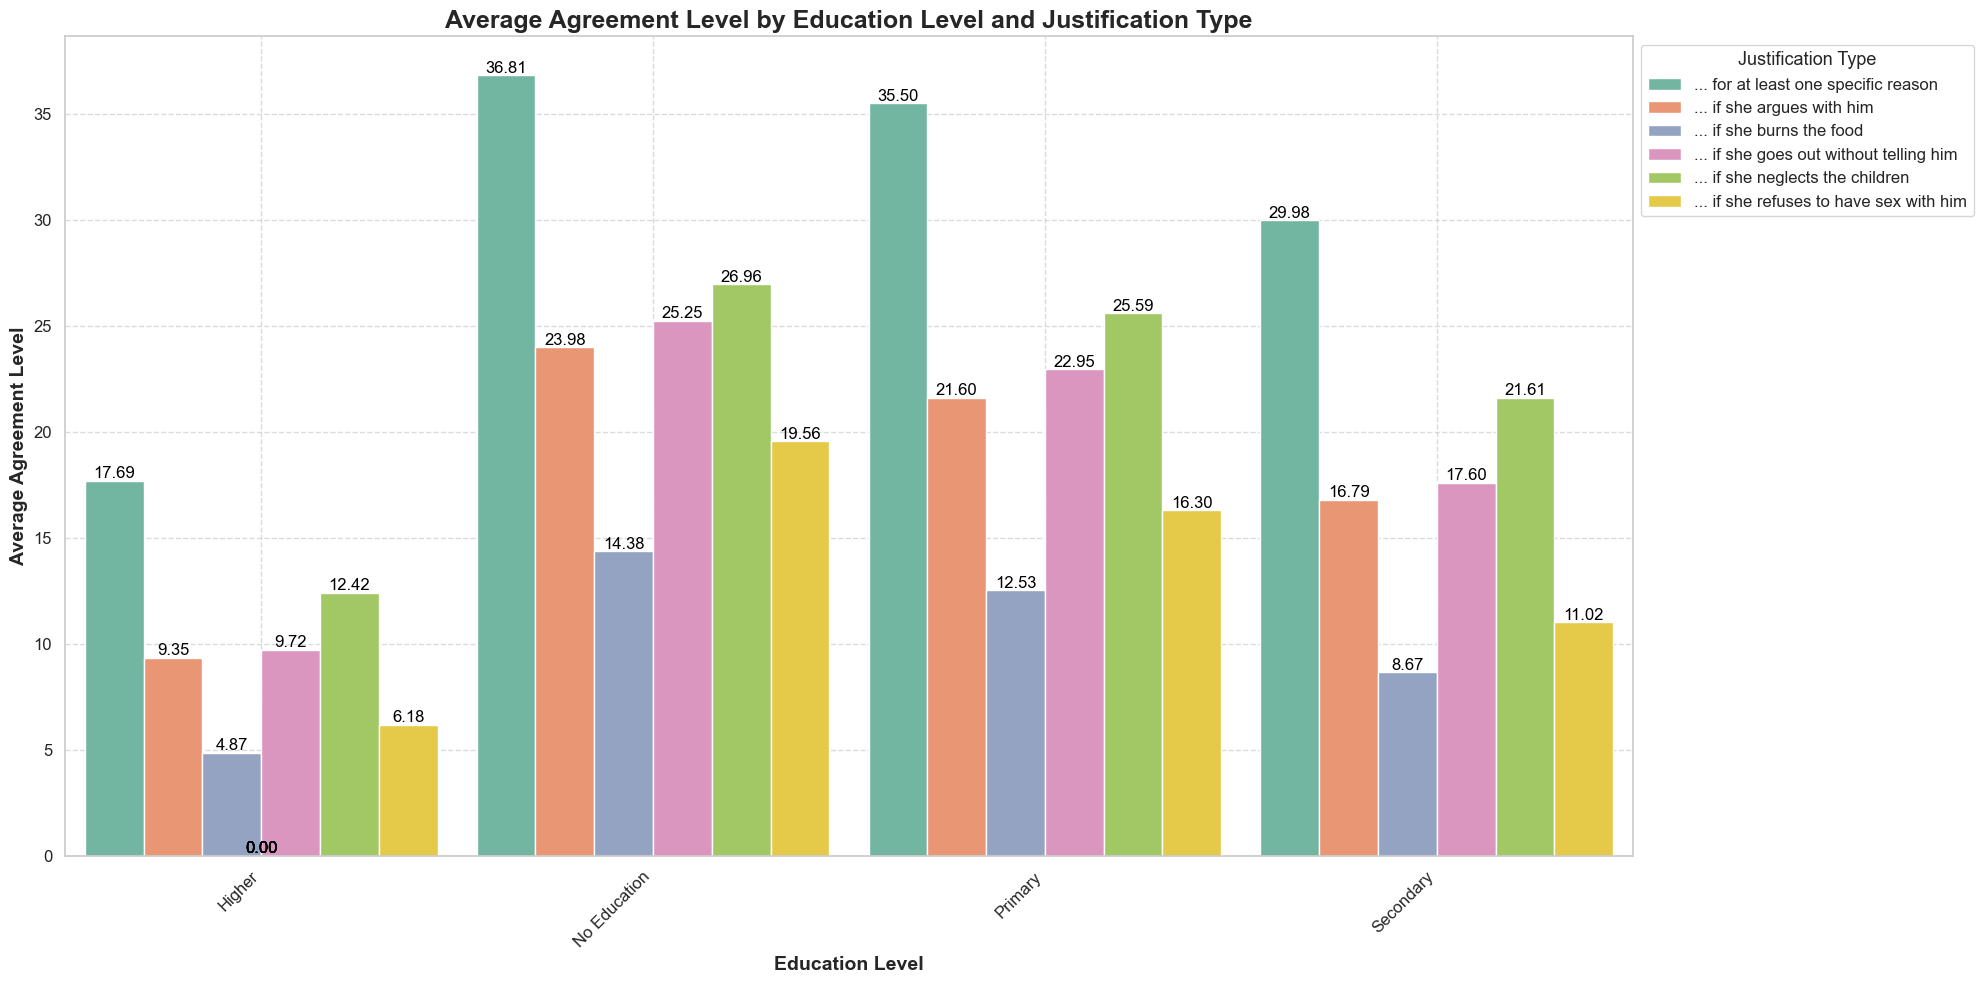

In [111]:
# Average Agreement Level by Education Level and Justification Type

education_data = data[data["Demographics Question"] == "Education"].copy()
education_data['Value'] = pd.to_numeric(education_data['Value'], errors='coerce')

agreement_data = education_data.groupby(['Demographics Response', 'Question'])['Value'].mean().reset_index()

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

unique_questions = agreement_data['Question'].unique()
colors = sns.color_palette("Set2", n_colors=len(unique_questions))

ax = sns.barplot(data=agreement_data, x='Demographics Response', y='Value', hue='Question', palette=colors, width=0.9)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("Average Agreement Level by Education Level and Justification Type", fontsize=18, weight='bold')
plt.xlabel("Education Level", fontsize=14, weight='bold')
plt.ylabel("Average Agreement Level", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Justification Type", title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


## Average Agreement Levels by Education Level and Justification Type  

This chart examines the correlation between education levels and agreement levels for different justification types regarding specific statements:

- **Higher Education**: Respondents with higher education show consistently lower agreement levels across all justification types, indicating greater critical thinking or social awareness.  
- **No Education**: Respondents without education exhibit the highest agreement levels, especially for statements like “if she goes out without telling him” (36.81%), suggesting traditional norms or less exposure to alternative views.  
- **Primary Education**: Agreement levels are moderately high, reflecting a transitional perspective influenced by basic educational exposure.  
- **Secondary Education**: Shows agreement levels lower than “No Education” but higher than “Higher Education,” implying a mixed influence of traditional and modern views.  
- **Justification Variability**: Statements like “if she goes out without telling him” consistently have higher agreement percentages across all education levels, while more severe statements like “if she burns the food” or “if she refuses to have sex with him” garner lower agreement levels.  

### Key Insight: 
Education strongly impacts agreement levels, with higher education correlating with reduced justification for the surveyed statements, reflecting increased gender equity and critical reasoning.

In [121]:
mismatched_countries = set(data_countries) - set(geo_countries)
print(mismatched_countries)

{'Sao Tome and Principe', 'Maldives', 'Kyrgyz Republic', 'Comoros', "Cote d'Ivoire", 'Dominican Republic', 'Congo Democratic Republic', 'Eswatini'}


In [122]:
import folium
import pandas as pd
import geopandas as gpd

regional_pivot = data.groupby("Country")["Value"].mean().reset_index()

world_geo = gpd.read_file("C:/Users/prana/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

geo_countries = world_geo["NAME"].unique()
data_countries = regional_pivot["Country"].unique()


country_name_mapping = {
    'Dominican Republic': 'Dominican Rep.',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Eswatini': 'eSwatini',
    'Sao Tome and Principe': 'São Tomé and Príncipe',
    'Congo Democratic Republic': 'Dem. Rep. Congo',
    'Comoros': 'Comores',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Maldives': 'Maldives'
}


regional_pivot["Country"] = regional_pivot["Country"].replace(country_name_mapping)

world_geo = world_geo.merge(regional_pivot, how="left", left_on="NAME", right_on="Country")

world_map = folium.Map(
    location=[20, 0],  
    zoom_start=2, 
    min_zoom=2,  
    max_zoom=6,  
    scrollWheelZoom=False,  
    dragging=False  
)

choropleth = folium.Choropleth(
    geo_data=world_geo,
    data=regional_pivot,
    columns=["Country", "Value"],
    key_on="feature.properties.NAME",
    fill_color="Reds",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Average Agreement Level (%)"
).add_to(world_map)

folium.GeoJsonTooltip(
    fields=["NAME", "Value"],
    aliases=["Country: ", "Agreement Level: "],
    localize=True
).add_to(choropleth.geojson)

world_map.save("agreement_levels_map.html")
world_map


The content in the notebook provides detailed insights into how demographic factors, particularly education, influence attitudes toward violence against women. Based on the extracted information, here are recommendations and policy suggestions to control or reduce violence against women and ensure their safety:

---

### *Strategies to Reduce Violence Against Women*

1. *Promote Education and Awareness Campaigns*
   - *Insight:* Higher education correlates with reduced justification for violence.
   - *Policy Recommendations:*
     - Introduce and promote free education programs, especially for women and girls, in rural and underprivileged areas.
     - Incorporate gender equality and anti-violence themes into school curriculums to foster awareness from an early age.
     - Conduct public awareness campaigns targeting both genders to challenge traditional norms justifying violence.

2. *Empower Women Economically*
   - *Insight:* Economic dependency increases vulnerability to violence.
   - *Policy Recommendations:*
     - Provide skill-based training programs and job opportunities for women.
     - Create financial support systems like micro-loans for women entrepreneurs to enhance economic independence.
     - Implement equal pay laws and enforce them strictly.

3. *Strengthen Legal and Justice Systems*
   - *Insight:* Weak legal enforcement allows violent practices to persist.
   - *Policy Recommendations:*
     - Ensure stricter penalties for violence against women to deter offenders.
     - Train law enforcement officials to handle cases of violence sensitively and ensure fair investigations.
     - Establish fast-track courts to resolve cases of violence against women swiftly.

4. *Enhance Community Support Systems*
   - *Insight:* Societal norms influence attitudes toward violence.
   - *Policy Recommendations:*
     - Create local women’s groups or committees to support victims and spread awareness.
     - Introduce mandatory counseling programs for perpetrators to address behavioral issues.
     - Encourage community leaders to advocate against violence and challenge outdated patriarchal norms.

5. *Improve Accessibility to Reporting and Resources*
   - *Insight:* Many victims do not report due to lack of access or fear.
   - *Policy Recommendations:*
     - Set up 24/7 helplines and online platforms to report violence confidentially.
     - Expand the availability of women’s shelters and legal aid services.
     - Integrate violence reporting into healthcare systems, so victims can access help discreetly when seeking medical care.

6. *Leverage Technology for Women’s Safety*
   - *Insight:* Technology can enhance safety measures.
   - *Policy Recommendations:*
     - Develop safety apps with features like emergency SOS alerts, GPS tracking, and trusted contacts.
     - Use AI to monitor online behavior and flag abusive language or potential threats.
     - Implement surveillance systems in high-risk areas with prompt police intervention mechanisms.

7. *Address Cultural and Religious Norms*
   - *Insight:* Cultural acceptance of violence often normalizes abuse.
   - *Policy Recommendations:*
     - Work with religious and cultural leaders to promote narratives of equality and non-violence.
     - Ban cultural practices that justify violence, such as child marriage or dowry systems.
     - Educate communities about the detrimental impacts of such practices on societal progress.

---

### *Broader Policies for Women's Safety*

1. *Comprehensive Gender Equality Laws*
   - Mandate anti-discrimination laws in workplaces, educational institutions, and public services.
   - Make gender-sensitivity training compulsory in schools, workplaces, and government offices.

2. *Integrated Safety Audits*
   - Regularly assess urban and rural areas for women's safety, addressing issues like poor lighting, unsafe public transport, and inadequate police presence.

3. *Victim Rehabilitation Programs*
   - Provide free medical and psychological support to survivors of violence.
   - Offer long-term reintegration programs to help victims rebuild their lives.

4. *Collaborative International Efforts*
   - Partner with global organizations to share best practices and resources for tackling violence against women.
   - Use international benchmarks to evaluate and improve national policies.

---

*Key Takeaway:* Education, legal frameworks, economic empowerment, and societal transformation are critical in combating violence against women. Addressing these areas through targeted policies can create a safer and more equitable environment for women globally.

# Analysis by - 
- ## **Manoj R** - manojr01042004@gmail.com
- ## **Pranav S** - me@pranavsuresh.tech